<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# Machine Learning for $t\bar{t}Z$ Opposite-sign dilepton analysis 
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to implement Machine Learning in the $t\bar{t}Z$ Opposite-sign dilepton analysis, following the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

The whole notebook takes less than an hour to follow through.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

Notebooks are a perfect platform to develop Machine Learning for your work, since you'll need exactly those 3 things: code, visualisations and narrative text!

We're interested in Machine Learning because we can design an algorithm to figure out for itself how to do various analyses, potentially saving us countless human-hours of design and analysis work.

Machine Learning use within ATLAS includes: 
* particle tracking
* particle identification
* signal/background classification
* and more!

This notebook will focus on ROC curves.

By the end of this notebook you will be able to:
1. run machine learning algorithms to classify signal and background
2. know some things you can change to improve your machine learning algorithms

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

<CENTER><img src="images/feynman_diagrams/ttZ_feynman.png" style="width:40%"></CENTER>

## Introduction (from Section 1)

Properties of the top quark have been explored by the
Large Hadron Collider (LHC) and previous collider experiments in great detail. 

Other properties of the top quark are
now becoming accessible, owing to the large center-of-mass energy and luminosity at the LHC.

Measurements of top-quark pairs in association with a Z boson ($t\bar{t}Z$) provide a direct probe of the
weak couplings of the top quark. These couplings
may be modified in the presence of physics beyond the
Standard Model (BSM). Measurements of the $t\bar{t}Z$ production cross sections, $\sigma_{t\bar{t}Z}$, can be used to
set constraints on the weak couplings of the top quark. 

The production of $t\bar{t}Z$ is often an important
background in searches involving final states with multiple
leptons and b-quarks. These processes also constitute an
important background in measurements of the associated
production of the Higgs boson with top quarks.

This paper presents measurements of the $t\bar{t}Z$ cross section using proton–proton (pp) collision data
at a center-of-mass energy $\sqrt{s} = 13 TeV.

The final states of top-quark pairs produced in association with a
Z boson contain up to four isolated, prompt leptons. In this analysis, events with two opposite-sign
(OS) leptons are considered. The dominant backgrounds
in this channel are Z+jets and $t\bar{t}$, 

(In this paper, lepton is used to denote electron or muon, and prompt lepton is used to denote a lepton produced in a Z or W
boson decay, or in the decay of a τ-lepton which arises from a Z or W boson decay.)

## Data and simulated samples (from Section 3)

The data were collected with the ATLAS detector at a proton–proton (pp) collision
energy of 13 TeV. 

Monte Carlo (MC) simulation samples are used to model the expected signal and background distributions
in the different control, validation and signal regions described below. All samples were processed through the
same reconstruction software as used for the data. 

## Opposite-sign dilepton analysis (from Section 5A)

The OS dilepton analysis targets the $t\bar{t}Z$ process, where both top quarks decay hadronically and the Z boson
decays to a pair of leptons (electrons or muons). Events are required to have exactly two opposite-sign leptons.
Events with additional isolated leptons are rejected. The leading (subleading) lepton is required to have a
transverse momentum of at least 30 (15) GeV.

The OS dilepton analysis is affected by large backgrounds from Z+jets or $t\bar{t}$ production, both characterized
by the presence of two leptons. 

The signal region
requirements are summarized in Table 1 below.

| Variable | Selection |
|------|------|
|   Leptons  | = 2, opposite sign |
|   $p_T$ (leading lepton)   | > 30 GeV |
|   $p_T$ (subleading lepton)   | > 15 GeV |

Table 1: Summary of the event selection requirements in the OS dilepton signal regions.

This is a subset of Table 2 of the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

<a id='contents'></a>

Contents: 

[Running a Jupyter notebook](#running) <br />
[To setup first time](#setupfirsttime) <br />
[To setup everytime](#setupeverytime) <br />
  [File path](#fraction) <br />
  [Get data from files](#get_data_from_files) <br />

[Machine learning](#MVA) <br />
  [Training and Testing split](#train_test_split) <br />
  [Training](#MVA_training) <br />
  
[Going further](#going_further) <br />

<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Cell -> Run All.

To propagate a change you've made to a piece of code, click Cell -> Run All Below.

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.

[Back to contents](#contents)

<a id='setupfirsttime'></a>

## First time setup on your computer (no need on mybinder)
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If you open on mybinder, you don't need to run this cell.

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --user pip # update the pip package installer
!{sys.executable} -m pip install -U pandas sklearn --user # install required packages
import yaml
import subprocess
import sys

# Path to your binder/environment.yml file
environment_file = "../../binder/environment.yml"

# Packages you want to install
required_packages = ['scikit-learn', 'pandas', 'numpy', 'matplotlib']

# Load the environment.yml file
with open(environment_file, 'r') as file:
    environment_data = yaml.safe_load(file)

# Extract dependencies
dependencies = environment_data.get('dependencies', [])

# Create a list to hold the packages with versions
install_packages = []

# Find the versions for the required packages
for dep in dependencies:
    # Check if the dependency is a string (package name)
    if isinstance(dep, str):
        for package in required_packages:
            if dep.startswith(package):
                install_packages.append(dep)

# Install packages using pip
if install_packages:
    print(f"Installing packages: {install_packages}")
    subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "--user"] + install_packages)
else:
    print("No matching packages found in environment.yml.")

[Back to contents](#contents)

<a id='setupeverytime'></a>

## To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook.

We're going to be using a number of tools to help us:
* pandas: lets us store data as dataframes, a format widely used in Machine Learning
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations

In [1]:
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting

<a id='fraction'></a>

## File path

In [2]:
#csv_path = "~/13tevatlasopendataguide2020/docs/visualization/CrossFilter/13TeV_ttZ.csv" # local 
csv_path = "https://gitlab.cern.ch/atlas-outreach-data-tools/histogram-analyser/-/raw/678fbd40c9d2886b612042ea28f7a0369574499a/HistogramAnalyser/13TeV_ttZ.csv" # web address

[Back to contents](#contents)

<a id='get_data_from_files'></a>

## Get data from files

define function to get data from files

The datasets used in this notebook have already been filtered to include exactly 2 leptons per event, so that processing is quicker.

In [3]:
all_data = pd.read_csv(csv_path) # read all data
signal_df = all_data[all_data['type']==1].drop(['type','weight'], axis=1) # get signal dataframe
background_df = all_data[(all_data['type']!=0) & (all_data['type']!=1)].drop(['type','weight'], axis=1) # background dataframe
signal_df # print the dataframe to take a look

,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets
145370,0,5,5.76,90.78,1.32,1.40,139.59,1
145371,0,4,97.16,91.32,0.99,1.37,175.51,1
145372,0,5,25.66,88.16,1.67,1.70,91.10,1
145373,0,5,64.06,91.00,2.69,2.71,22.76,2
145374,0,5,52.33,75.13,0.10,1.12,152.97,1
...,...,...,...,...,...,...,...,...
154240,1,4,14.78,65.87,0.66,0.67,196.76,2
154241,1,8,33.97,91.72,0.60,0.98,177.02,3
154242,1,5,56.07,62.15,1.39,1.49,88.68,0
154243,1,10,143.17,83.46,2.78,2.79,60.34,1


[Back to contents](#contents)

<a id='MVA'></a>

## Machine learning

Organise data ready for BDT

In [4]:
# for sklearn data is usually organised                                                                                                                                           
# into one 2D array of shape (n_samples x n_features)                                                                                                                             
# containing all the data and one array of categories                                                                                                                             
# of length n_samples  

X = np.concatenate([signal_df.values, background_df.values]) # concatenate the list of MC dataframes into a single 2D array of features, called X
y = np.concatenate([np.ones(signal_df.shape[0]), np.zeros(background_df.shape[0])]) # concatenate the list of lables into a single 1D array of labels, called y

[Back to contents](#contents)

<a id='train_test_split'></a>

### The Training and Testing split
One of the first things to do is split your data into a training and testing set. This will split your data into train-test sets: 75%-25%. It will also shuffle entries so you will not get the first 75% of <span style="color:red">X</span> for training and the last 25% for testing. This is particularly important in cases where you load all signal events first and then the background events.

Here we split our data into two independent samples. The split is to create a training and testing set. The first will be used for training the classifier and the second to evaluate its performance.

We don't want to test on events that we used to train on, this prevents overfitting to some subset of data so the network would be good for the test data but much worse at any *new* data it sees.

In [5]:
from sklearn.model_selection import train_test_split

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=492 )

[Back to contents](#contents)

<a id='MVA_training'></a>

### Training your machine learning algorithm

We'll use SciKit Learn (sklearn) in this tutorial. Other possible tools include keras and pytorch. 

After instantiating our <span style="color:red">GradientBoostingClassifier</span>, call the <span style="color:red">fit()</span> method with the training sample as an argument. This will train the tree, now we are ready to evaluate the performance on the held out testing set.

A useful plot to judge the performance of a classifier is to look at the Receiver Operarting Characteristic (ROC) curve directly.

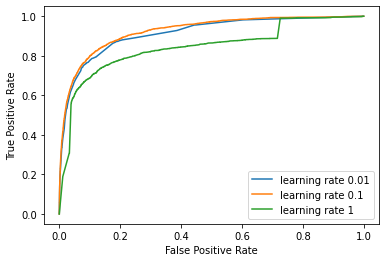

In [6]:
from sklearn.ensemble import GradientBoostingClassifier # BoostType
from sklearn.metrics import roc_curve, auc

for learning_rate_i in [0.01,0.1,1]:
    bdt = GradientBoostingClassifier(learning_rate=learning_rate_i)
    bdt.fit(X_train, y_train) # fit BDT to training set

    decisions = bdt.decision_function(X_test).ravel() # get probabilities on test set

    # Compute ROC curve and area under the curve
    fpr, tpr, _ = roc_curve(y_test, # actual
                            decisions ) # predicted

    plt.plot(fpr, tpr, label='learning rate '+str(learning_rate_i)) # plot test ROC curve

    plt.xlabel('False Positive Rate') # x-axis label
    plt.ylabel('True Positive Rate') # y-axis label
    plt.legend() # add legend

Notice how the ROC curve changes with each different learning rate.

[Back to contents](#contents)

Putting everything into a machine learning algorithm means we only have 1 variable to optimise. The <span style="color:blue">signal</span> and <span style="color:red">background</span> distributions are separated much better when looking at machine learning output, compared to individual variables. Using machine learning algorithms also achieves much higher S/B values than on individual variables.

machine learning algorithm can achieve better S/B ratios because they find correlations in many dimensions that will give better signal/background classification.

Hopefully you've enjoyed this discussion on using machine learning algorithms to select for <span style="color:blue">signal</span> to <span style="color:red">background</span>.

<a id='going_further'></a>

## Going further

If you want to go further, there are a number of things you could try: 

* **Modify some BDT hyper-parameters** in '[Training your machine learning algorithm](#MVA_training)'. Cell -> Run All Below. You may find the [sklearn documentation on GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) helpful.
* **Try other machine learning algorithms** in '[Training your machine learning algorithm](#MVA_training)'. Cell -> Run All Below. You may find [sklearn documentation on supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) helpful.

With each change, keep an eye on the ROC curve.

[Back to contents](#contents)